# Law of Large Numbers Visualization

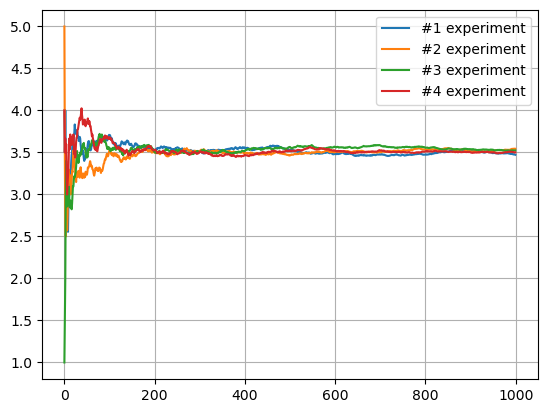

In [7]:
import numpy as np
import matplotlib.pyplot as plt

calc_times = 1000
sample_array = np.array([1, 2, 3, 4, 5, 6])
num_cnt = np.arange(1, calc_times + 1)

for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p/ num_cnt, label=f"#{i+1} experiment")
    plt.legend()
    plt.grid(True)

# Central Limit Theorem

In [ ]:
from scipy.stats import norm

def simulate_die_clt(n_samples: int = 10_000, sample_size: int = 30):
    """
    Demonstrate the Central Limit Theorem with a fair six-sided die.
    Parameters
    ----------
    n_samples : int number of samples
    sample_size : int size of each sample
    Returns
    -------
    sample_means : np.ndarray, shape (n_samples,)
    Array containing the sample mean from each replication.
    """
    #Draw all rolls in one vectoized call: shape = (n_samples, sample_size)
    samples = np.random.randint(1, 7, size=(n_samples, sample_size))
    sample_means = samples.mean(axis=1)

    mu, sigma2 = 3.5, 35 / 12
    sigma = np.sqrt(sigma2)
    x = np.linspace(smample_means.min(), sample_means.max(), 300)

    plt.figure()
    plt.hist(sample_means, bins=39, density=True, alpha=0.7, label='Simulated means')
    plt.plot(x, norm.pdf(x, mu, sigma / np.sqrt(sample_size)), linewidth=2, label=r'${N}(\mu, \sigma/\sqrt{n})$')
    plt.xlabel(f'Samplemean (n = {sample_size})')
    plt.ylabel('Density')
    plt.title(f'CLT: {n_samples:,} means of {sample_size} die rolls')
    plt.legend()